In [1]:
!pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00


In [126]:
from tf_explain.core.grad_cam import GradCAM
import matplotlib.pyplot as plt
from keras.models import Model
from PIL import Image
from skimage.transform import resize
from keras.models import load_model
from google.colab.patches import cv2_imshow
import tensorflow as tf
import numpy as np
import imutils
import cv2
import os

In [127]:
os.chdir("/content/drive/MyDrive/CCDS")

In [128]:
!ls

'CCDS flow.gdraw'			     Recommendation_letter.jpeg
 Grad-CAM.ipynb				    'Saratani AI G-CAM.ipynb'
 hamo_nu0dg1Y_QbEQ5NG_cpPg5KI_9OYtZlu.jpeg   saratani_predictive_model.h5
 Image1_iiMUjQ1.jpg			     thsss_bpNNAVO.jpeg


In [167]:
saratani = load_model('saratani_predictive_model.h5')
print(saratani.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       7

In [182]:
# Create a GradCAM object
explainer = GradCAM()

# Choose a target class index (e.g., the index corresponding to the class you want to localize)
target_class_index = 2  # Change this to the index of the class you want to visualize

# Load and preprocess your image
img_path = "hamo_nu0dg1Y_QbEQ5NG_cpPg5KI_9OYtZlu.jpeg"
# img_path = 'thsss_bpNNAVO.jpeg'

orig = cv2.imread(img_path)
orig_resized = resize(orig, (64,64,3))
img = cv2.imread(img_path)
img = resize(img, (64, 64, 3))
img = np.asarray(img).astype('float32')
img = img.reshape((1, 64, 64, 3))

# Generate Grad-CAM heatmap
grid = explainer.explain(validation_data=(img, None), model=saratani, class_index=target_class_index)

In [183]:
# Normalize the heatmap values to [0, 1]
heatmap = grid[0] / np.max(grid[0])

print(heatmap.shape)
# Resize the heatmap to match the original image dimensions
heatmap = cv2.resize(heatmap, (orig_resized.shape[1], orig_resized.shape[1]))

# Convert heatmap to RGB format
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

(64, 3)


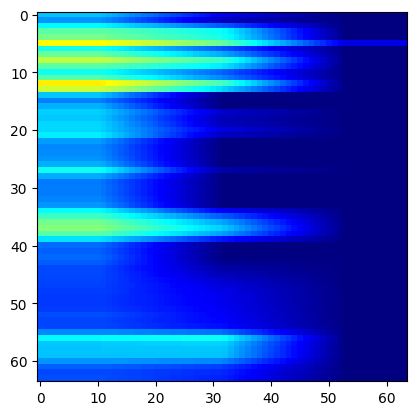

In [186]:
plt.imshow(heatmap)
plt.show()

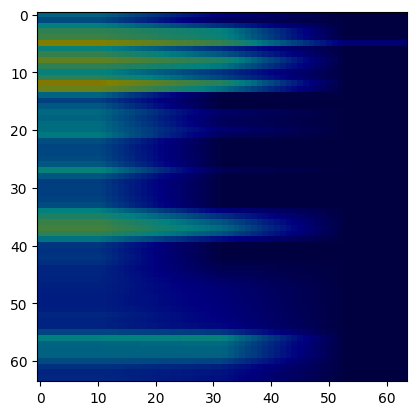

In [187]:
# Overlay heatmap on the original image
output = cv2.addWeighted(orig_resized.astype(np.uint8), 0.5, heatmap.astype(np.uint8), 0.5, 0)
plt.imshow(output)
plt.show()

In [188]:
orig.shape, heatmap.shape, output.shape, orig_resized.shape

((183, 275, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3))

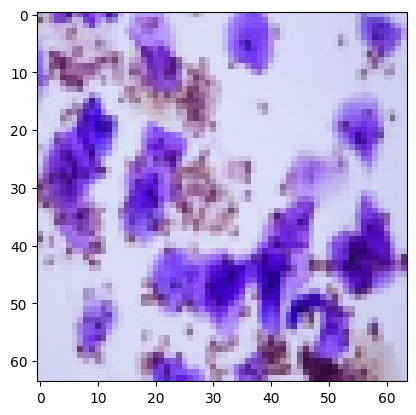

In [189]:
plt.imshow(orig_resized)
plt.show()

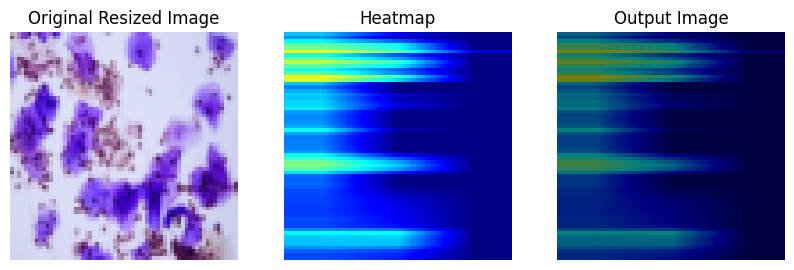

In [190]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

# Display the original resized image
axs[0].imshow(orig_resized)
axs[0].set_title('Original Resized Image')

# Display the heatmap
axs[1].imshow(heatmap, cmap='viridis')
axs[1].set_title('Heatmap')

# Display the output image
axs[2].imshow(output)
axs[2].set_title('Output Image')

# Optional: Hide tick marks and labels
for ax in axs:
    ax.axis('off')

plt.show()
